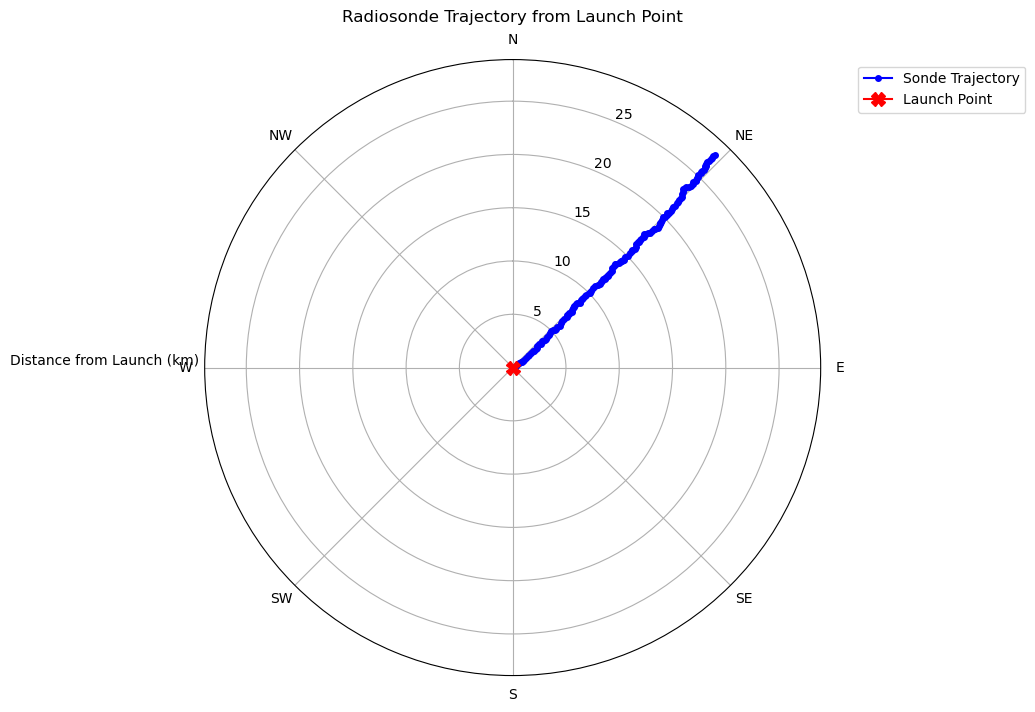

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from math import radians, degrees, sin, cos, atan2, sqrt

def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the great-circle distance between two points on Earth
    (specified in decimal degrees) using the Haversine formula.
    Returns distance in kilometers.
    """
    R = 6371  # Radius of Earth in kilometers

    lat1_rad = radians(lat1)
    lon1_rad = radians(lon1)
    lat2_rad = radians(lat2)
    lon2_rad = radians(lon2)

    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad

    a = sin(dlat / 2)**2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

def calculate_bearing(lat1, lon1, lat2, lon2):
    """
    Calculate the bearing (direction) from point 1 to point 2.
    Returns bearing in degrees (0-360, North=0, East=90, South=180, West=270).
    """
    lat1_rad = radians(lat1)
    lon1_rad = radians(lon1)
    lat2_rad = radians(lat2)
    lon2_rad = radians(lon2)

    dlon = lon2_rad - lon1_rad

    y = sin(dlon) * cos(lat2_rad)
    x = cos(lat1_rad) * sin(lat2_rad) - sin(lat1_rad) * cos(lat2_rad) * cos(dlon)

    bearing_rad = atan2(y, x)
    bearing_deg = degrees(bearing_rad)
    bearing_deg = (bearing_deg + 360) % 360  # Normalize to 0-360 degrees

    return bearing_deg

def generate_dummy_radiosonde_data(
    launch_lat=17.3850, launch_lon=78.4867, # Hyderabad, India
    num_points=100,
    avg_speed_km_per_point=0.1, # Average distance covered per simulated point
    wind_direction_deg=45, # General wind direction (NE)
    random_variation_factor=0.05
):
    """
    Generates dummy latitude and longitude data for a radiosonde trajectory.
    Simulates movement from a launch point with a general wind direction and some randomness.

    Args:
        launch_lat (float): Launch latitude.
        launch_lon (float): Launch longitude.
        num_points (int): Number of GPS points to simulate.
        avg_speed_km_per_point (float): Average distance the sonde moves per point (in km).
        wind_direction_deg (float): General direction of wind in degrees (0-360).
        random_variation_factor (float): Factor for random deviation from wind direction.

    Returns:
        list: A list of (latitude, longitude) tuples.
    """
    trajectory = [(launch_lat, launch_lon)]
    current_lat, current_lon = launch_lat, launch_lon

    for _ in range(num_points - 1):
        # Simulate movement based on wind direction and some randomness
        angle_rad = radians(wind_direction_deg + np.random.uniform(-random_variation_factor, random_variation_factor) * 360)
        distance_km = avg_speed_km_per_point * (1 + np.random.uniform(-0.5, 0.5)) # Vary speed slightly

        # Convert distance and bearing to delta lat/lon (approximate for small distances)
        # 1 degree of latitude is approximately 111 km
        # 1 degree of longitude is approximately 111 * cos(latitude) km
        delta_lat = (distance_km * cos(angle_rad)) / 111.0
        delta_lon = (distance_km * sin(angle_rad)) / (111.0 * cos(radians(current_lat)))

        current_lat += delta_lat
        current_lon += delta_lon
        trajectory.append((current_lat, current_lon))

    return trajectory

def plot_radiosonde_trajectory(trajectory_data, launch_lat, launch_lon):
    """
    Plots the radiosonde trajectory on a polar plot.

    Args:
        trajectory_data (list): List of (latitude, longitude) tuples.
        launch_lat (float): Latitude of the launch point.
        launch_lon (float): Longitude of the launch point.
    """
    distances = []
    bearings_rad = []

    # Calculate distances and bearings relative to the launch point
    for i, (lat, lon) in enumerate(trajectory_data):
        if i == 0: # Launch point
            distances.append(0)
            bearings_rad.append(0) # Arbitrary for origin
        else:
            dist = haversine_distance(launch_lat, launch_lon, lat, lon)
            bearing = calculate_bearing(launch_lat, launch_lon, lat, lon)
            distances.append(dist)
            bearings_rad.append(radians(bearing))

    # --- Create the Polar Plot ---
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})

    # Plot the trajectory
    ax.plot(bearings_rad, distances, marker='o', markersize=4, linestyle='-', color='blue', label='Sonde Trajectory')

    # Mark the launch point
    ax.plot(0, 0, marker='X', markersize=10, color='red', label='Launch Point', zorder=5)

    # Set 0 degrees to North and direction clockwise
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1) # Clockwise direction

    # Set radial ticks and labels
    ax.set_rlabel_position(22.5)  # Position of the radial labels (distance)
    ax.set_ylabel('Distance from Launch (km)', rotation=0, ha='right') # Label for radial axis

    # Set angular ticks and labels (compass directions)
    ax.set_xticks(np.linspace(0, 2*np.pi, 8, endpoint=False))
    ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'])

    ax.set_title('Radiosonde Trajectory from Launch Point', va='bottom')
    ax.grid(True)
    ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1)) # Place legend outside plot

    plt.show()

if __name__ == "__main__":
    # Define launch coordinates (example: Hyderabad, India)
    launch_lat = 17.3850
    launch_lon = 78.4867

    # Generate dummy data for the radiosonde's path
    # Simulates a balloon moving generally towards the Northeast (45 degrees)
    dummy_trajectory = generate_dummy_radiosonde_data(
        launch_lat=launch_lat,
        launch_lon=launch_lon,
        num_points=150, # More points for a smoother curve
        avg_speed_km_per_point=0.2, # Moves a bit faster
        wind_direction_deg=45, # Northeast
        random_variation_factor=0.1 # More random wiggles
    )

    # Plot the trajectory
    plot_radiosonde_trajectory(dummy_trajectory, launch_lat, launch_lon)

Attempting to load real data...

Plotting REAL radiosonde trajectories...


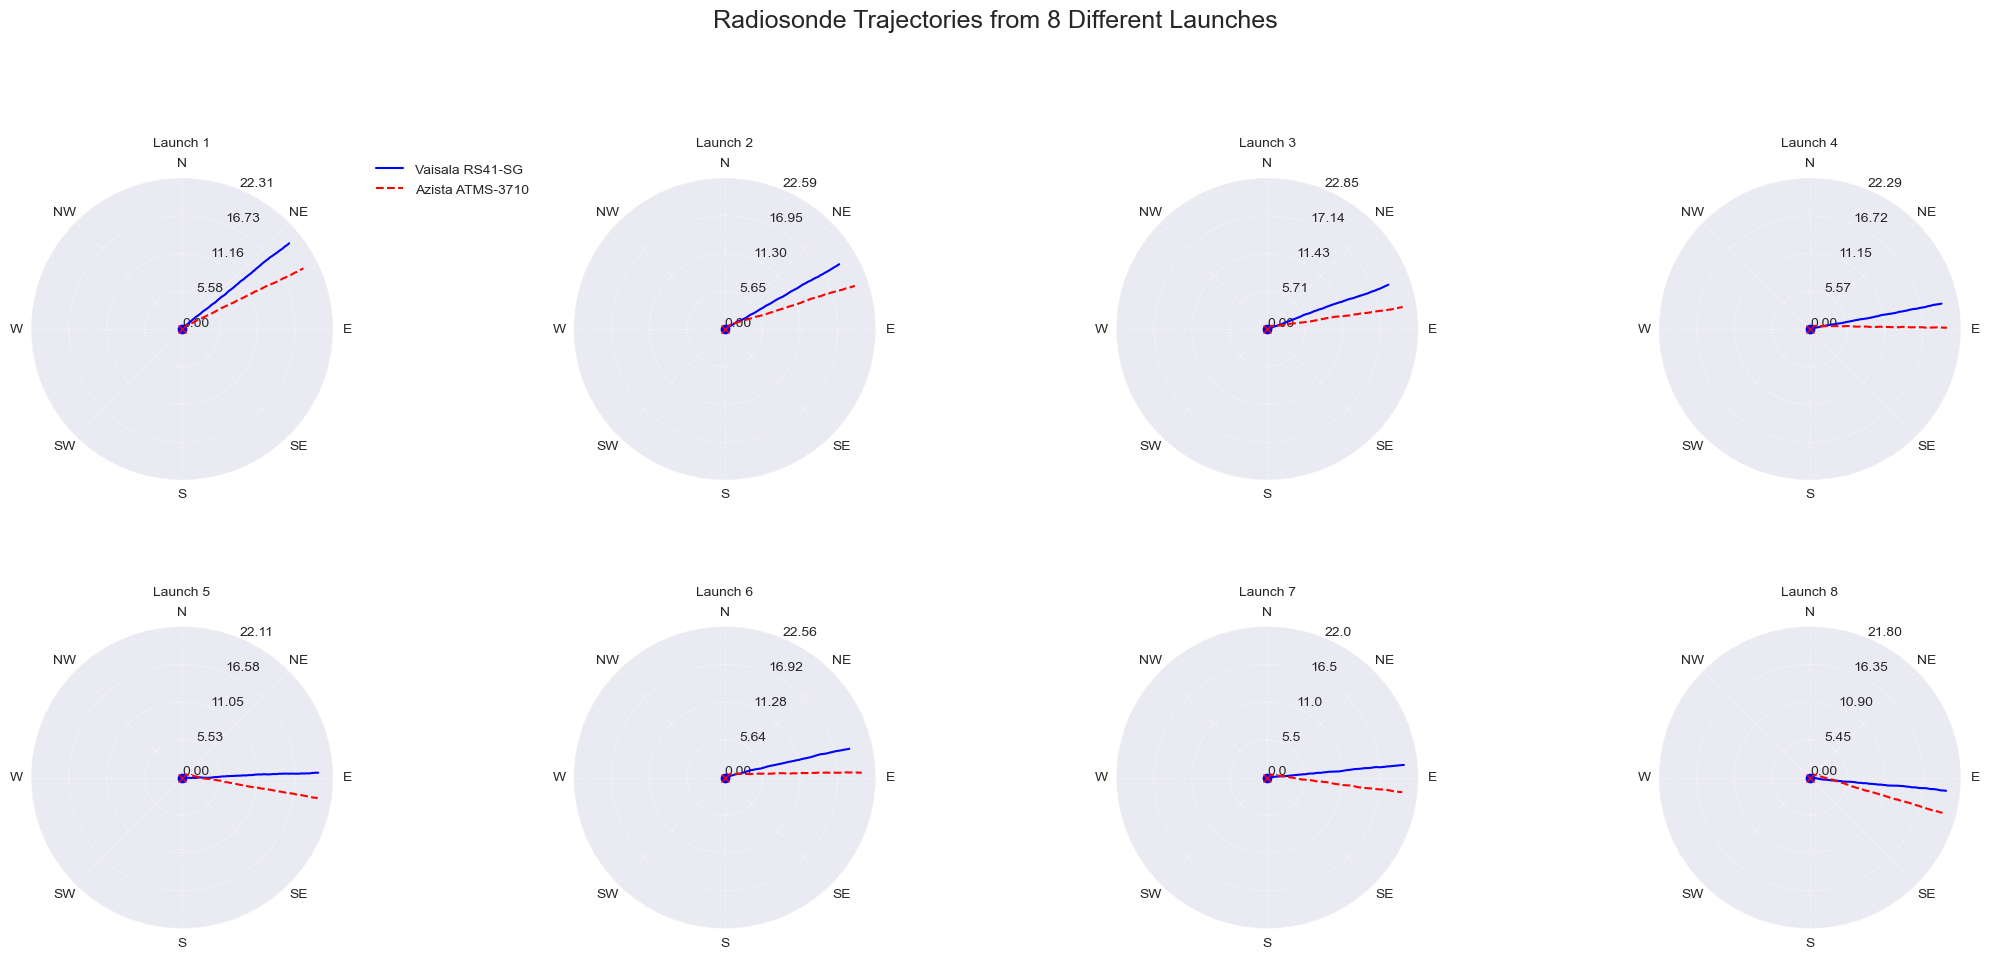

Plotting complete.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import radians, degrees, sin, cos, atan2, sqrt
import os

# --- Helper Functions for Polar Plot Calculations ---

def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the great-circle distance between two points on Earth
    (specified in decimal degrees) using the Haversine formula.
    Returns distance in kilometers.
    """
    R = 6371  # Radius of Earth in kilometers

    lat1_rad = radians(lat1)
    lon1_rad = radians(lon1)
    lat2_rad = radians(lat2)
    lon2_rad = radians(lon2)

    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad

    a = sin(dlat / 2)**2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

def calculate_bearing(lat1, lon1, lat2, lon2):
    """
    Calculate the bearing (direction) from point 1 to point 2.
    Returns bearing in degrees (0-360, North=0, East=90, South=180, West=270).
    """
    lat1_rad = radians(lat1)
    lon1_rad = radians(lon1)
    lat2_rad = radians(lat2)
    lon2_rad = radians(lon2)

    dlon = lon2_rad - lon1_rad

    y = sin(dlon) * cos(lat2_rad)
    x = cos(lat1_rad) * sin(lat2_rad) - sin(lat1_rad) * cos(lat2_rad) * cos(dlon)

    bearing_rad = atan2(y, x)
    bearing_deg = degrees(bearing_rad)
    bearing_deg = (bearing_deg + 360) % 360  # Normalize to 0-360 degrees

    return bearing_deg

# --- Utility Function: Generate Dummy Trajectory Data ---

def generate_dummy_launch_trajectory(
    launch_id,
    base_lat=17.3850, # Hyderabad, India
    base_lon=78.4867,
    num_points=100,
    avg_speed_km_per_point=0.2, # Average distance covered per simulated point
    general_wind_direction_deg=60 # General wind direction (e.g., NE)
):
    """
    Generates dummy latitude and longitude data for a single radiosonde trajectory.
    Adds slight variations based on launch_id for distinct launches.

    Args:
        launch_id (int/str): Identifier for the launch to introduce variations.
        base_lat (float): Base launch latitude.
        base_lon (float): Base launch longitude.
        num_points (int): Number of GPS points to simulate.
        avg_speed_km_per_point (float): Average distance the sonde moves per point (in km).
        general_wind_direction_deg (float): General direction of wind in degrees (0-360).

    Returns:
        pd.DataFrame: DataFrame containing 'Latitude' and 'Longitude' columns.
    """
    # Introduce slight variations per launch
    lat_offset = (launch_id % 3 - 1) * 0.01 # Small lat variation
    lon_offset = (launch_id % 4 - 2) * 0.01 # Small lon variation
    wind_variation = (launch_id % 5 - 2) * 5 # Small wind direction variation in degrees

    current_lat = base_lat + lat_offset
    current_lon = base_lon + lon_offset
    
    trajectory = [{'Latitude': current_lat, 'Longitude': current_lon}]

    for _ in range(num_points - 1):
        # Simulate movement based on general wind direction and some randomness
        angle_rad = radians(general_wind_direction_deg + wind_variation + np.random.uniform(-10, 10))
        distance_km = avg_speed_km_per_point * (1 + np.random.uniform(-0.3, 0.3)) # Vary speed slightly

        delta_lat = (distance_km * cos(angle_rad)) / 111.0
        delta_lon = (distance_km * sin(angle_rad)) / (111.0 * cos(radians(current_lat)))

        current_lat += delta_lat
        current_lon += delta_lon
        trajectory.append({'Latitude': current_lat, 'Longitude': current_lon})

    return pd.DataFrame(trajectory)

# --- Main Plotting Function ---

def plot_multi_launch_polar_trajectories(vaisala_launches_data, azista_launches_data):
    """
    Plots the trajectories of Vaisala and Azista radiosondes on 8 separate polar plots
    in a grid, maintaining uniform colors.

    Args:
        vaisala_launches_data (list of pd.DataFrame): List of DataFrames, each containing
                                                      'Latitude' and 'Longitude' for one Vaisala launch.
        azista_launches_data (list of pd.DataFrame): List of DataFrames, each containing
                                                     'Latitude' and 'Longitude' for one Azista launch.

    Expected DataFrame Columns:
    - 'Latitude'
    - 'Longitude'
    """
    if len(vaisala_launches_data) != 8 or len(azista_launches_data) != 8:
        print("Error: Please provide exactly 8 launch DataFrames for both Vaisala and Azista.")
        return

    # Define uniform colors for each sensor model
    vaisala_color = 'blue'
    azista_color = 'red'
    
    # Create a 2x4 grid of polar subplots
    fig, axs = plt.subplots(2, 4, figsize=(20, 10), subplot_kw={'projection': 'polar'})
    axs = axs.flatten() # Flatten the 2D array of axes for easy iteration

    plt.suptitle('Radiosonde Trajectories from 8 Different Launches', fontsize=18, y=1.02)

    for i in range(8):
        ax = axs[i]
        vaisala_df = vaisala_launches_data[i]
        azista_df = azista_launches_data[i]
        
        # Determine the launch point (first data point) for this specific launch
        # Ensure 'Latitude' and 'Longitude' columns exist
        if 'Latitude' not in vaisala_df.columns or 'Longitude' not in vaisala_df.columns:
            print(f"Error: Vaisala launch {i+1} DataFrame missing 'Latitude' or 'Longitude' columns.")
            continue
        if 'Latitude' not in azista_df.columns or 'Longitude' not in azista_df.columns:
            print(f"Error: Azista launch {i+1} DataFrame missing 'Latitude' or 'Longitude' columns.")
            continue

        launch_lat_v = vaisala_df['Latitude'].iloc[0]
        launch_lon_v = vaisala_df['Longitude'].iloc[0]
        launch_lat_a = azista_df['Latitude'].iloc[0]
        launch_lon_a = azista_df['Longitude'].iloc[0]

        # For simplicity, we'll use the Vaisala launch point as the origin for distance/bearing
        # You might choose a fixed site launch point if available
        origin_lat = launch_lat_v
        origin_lon = launch_lon_v

        # --- Process Vaisala Trajectory ---
        distances_v = []
        bearings_rad_v = []
        for index, row in vaisala_df.iterrows():
            if index == 0:
                distances_v.append(0)
                bearings_rad_v.append(0) # Arbitrary for origin
            else:
                dist = haversine_distance(origin_lat, origin_lon, row['Latitude'], row['Longitude'])
                bearing = calculate_bearing(origin_lat, origin_lon, row['Latitude'], row['Longitude'])
                distances_v.append(dist)
                bearings_rad_v.append(radians(bearing))
        
        # --- Process Azista Trajectory ---
        distances_a = []
        bearings_rad_a = []
        for index, row in azista_df.iterrows():
            if index == 0:
                distances_a.append(0)
                bearings_rad_a.append(0) # Arbitrary for origin
            else:
                dist = haversine_distance(origin_lat, origin_lon, row['Latitude'], row['Longitude'])
                bearing = calculate_bearing(origin_lat, origin_lon, row['Latitude'], row['Longitude'])
                distances_a.append(dist)
                bearings_rad_a.append(radians(bearing))

        # Plot Vaisala Trajectory
        ax.plot(bearings_rad_v, distances_v, color=vaisala_color, linewidth=1.5, label='Vaisala RS41-SG')
        ax.plot(0, 0, marker='o', markersize=6, color=vaisala_color, zorder=5) # Mark launch point for Vaisala

        # Plot Azista Trajectory
        ax.plot(bearings_rad_a, distances_a, color=azista_color, linestyle='--', linewidth=1.5, label='Azista ATMS-3710')
        ax.plot(0, 0, marker='x', markersize=6, color=azista_color, zorder=5) # Mark launch point for Azista

        # Set polar plot properties
        ax.set_theta_zero_location('N') # 0 degrees points North
        ax.set_theta_direction(-1)     # Clockwise direction (standard for bearings)
        ax.set_xticks(np.linspace(0, 2*np.pi, 8, endpoint=False))
        ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'])
        
        # Set radial ticks (distance) dynamically based on max distance in this subplot
        max_dist = max(max(distances_v), max(distances_a))
        r_ticks = np.linspace(0, max_dist * 1.1, 5) # 5 ticks up to 110% of max dist
        ax.set_yticks(r_ticks)
        ax.set_rlabel_position(22.5) # Position of radial labels

        ax.set_title(f'Launch {i+1}', va='bottom', fontsize=10)
        ax.grid(True, linestyle=':', alpha=0.7)
        
        # Add legend only to the first subplot to avoid cluttering all 8
        if i == 0:
            ax.legend(loc='lower left', bbox_to_anchor=(1.1, 0.9)) # Position it outside plot 0

    plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout for suptitle
    plt.show()


if __name__ == "__main__":
    # --- YOUR REAL DATA INTEGRATION PATH STARTS HERE ---

    # 1. DEFINE YOUR DATA FILE PATHS
    #    You need a list of 8 file paths for Vaisala launches and 8 for Azista launches.
    #    Each file should contain Latitude and Longitude data for a single launch.
    #    Replace these placeholder paths with the actual paths to your files.
    
    # Example (if your files are in the same directory as this script):
    # vaisala_file_paths = [f'vaisala_launch_{i+1}.csv' for i in range(8)]
    # azista_file_paths = [f'azista_launch_{i+1}.csv' for i in range(8)]

    # For demonstration, we'll create dummy files if real ones aren't found.
    # In a real scenario, you would list your actual filenames here.
    vaisala_file_paths = []
    azista_file_paths = []
    for i in range(8):
        vaisala_file_paths.append(f'dummy_vaisala_launch_{i+1}.csv')
        azista_file_paths.append(f'dummy_azista_launch_{i+1}.csv')

    # 2. LOAD YOUR DATA INTO LISTS OF PANDAS DATAFRAMES
    #    Each DataFrame in the list should contain 'Latitude' and 'Longitude' columns.

    loaded_vaisala_data = []
    loaded_azista_data = []
    data_loaded_successfully = True

    print("Attempting to load real data...")
    for i in range(8):
        try:
            # Vaisala data loading
            if os.path.exists(vaisala_file_paths[i]):
                df_v = pd.read_csv(vaisala_file_paths[i])
                # --- IMPORTANT: RENAME COLUMNS IF NECESSARY ---
                # If your Vaisala data has different column names (e.g., 'Lat', 'Lon'), rename them here:
                # df_v = df_v.rename(columns={'Your_Lat_Column': 'Latitude', 'Your_Lon_Column': 'Longitude'})
                if 'Latitude' not in df_v.columns or 'Longitude' not in df_v.columns:
                    raise ValueError(f"Vaisala launch {i+1} CSV must contain 'Latitude' and 'Longitude' columns.")
                loaded_vaisala_data.append(df_v)
            else:
                raise FileNotFoundError(f"Vaisala file not found: {vaisala_file_paths[i]}")

            # Azista data loading
            if os.path.exists(azista_file_paths[i]):
                df_a = pd.read_csv(azista_file_paths[i])
                # --- IMPORTANT: RENAME COLUMNS IF NECESSARY ---
                # If your Azista data has different column names (e.g., 'lat_sonde', 'long_sonde'), rename them here:
                # df_a = df_a.rename(columns={'lat_sonde': 'Latitude', 'long_sonde': 'Longitude'})
                if 'Latitude' not in df_a.columns or 'Longitude' not in df_a.columns:
                    raise ValueError(f"Azista launch {i+1} CSV must contain 'Latitude' and 'Longitude' columns.")
                loaded_azista_data.append(df_a)
            else:
                raise FileNotFoundError(f"Azista file not found: {azista_file_paths[i]}")

        except (FileNotFoundError, ValueError, pd.errors.EmptyDataError, pd.errors.ParserError) as e:
            print(f"Error loading data for launch {i+1}: {e}")
            print("Skipping real data loading and using dummy data for all launches.")
            data_loaded_successfully = False
            loaded_vaisala_data = [] # Clear any partially loaded data
            loaded_azista_data = []
            break # Exit the loop and use dummy data

    # --- PLOT THE DATA ---
    if data_loaded_successfully and loaded_vaisala_data and loaded_azista_data:
        print("\nPlotting REAL radiosonde trajectories...")
        plot_multi_launch_polar_trajectories(loaded_vaisala_data, loaded_azista_data)
    else:
        print("\nReal data could not be loaded. Generating and plotting DUMMY DATA for demonstration.")
        
        dummy_vaisala_launches = []
        dummy_azista_launches = []
        for i in range(8):
            # Create dummy files for demonstration if they don't exist
            if not os.path.exists(f'dummy_vaisala_launch_{i+1}.csv'):
                dummy_v_df = generate_dummy_launch_trajectory(launch_id=i, general_wind_direction_deg=60 + i*5)
                dummy_v_df.to_csv(f'dummy_vaisala_launch_{i+1}.csv', index=False)
            else:
                dummy_v_df = pd.read_csv(f'dummy_vaisala_launch_{i+1}.csv')
            dummy_vaisala_launches.append(dummy_v_df)

            if not os.path.exists(f'dummy_azista_launch_{i+1}.csv'):
                dummy_a_df = generate_dummy_launch_trajectory(launch_id=i + 0.5, general_wind_direction_deg=60 + i*5 + 10) # Slightly different
                dummy_a_df.to_csv(f'dummy_azista_launch_{i+1}.csv', index=False)
            else:
                dummy_a_df = pd.read_csv(f'dummy_azista_launch_{i+1}.csv')
            dummy_azista_launches.append(dummy_a_df)

        plot_multi_launch_polar_trajectories(dummy_vaisala_launches, dummy_azista_launches)

    print("Plotting complete.")

    # --- Optional: Clean up dummy files after demonstration ---
    # for i in range(8):
    #     if os.path.exists(f'dummy_vaisala_launch_{i+1}.csv'):
    #         os.remove(f'dummy_vaisala_launch_{i+1}.csv')
    #     if os.path.exists(f'dummy_azista_launch_{i+1}.csv'):
    #         os.remove(f'dummy_azista_launch_{i+1}.csv')

Attempting to load real data...
Error loading data for launch 1: Vaisala file not found: dummy_vaisala_launch_1.csv
Falling back to generating and plotting DUMMY DATA for all launches.

Real data could not be loaded. Generating and plotting DUMMY DATA for demonstration.


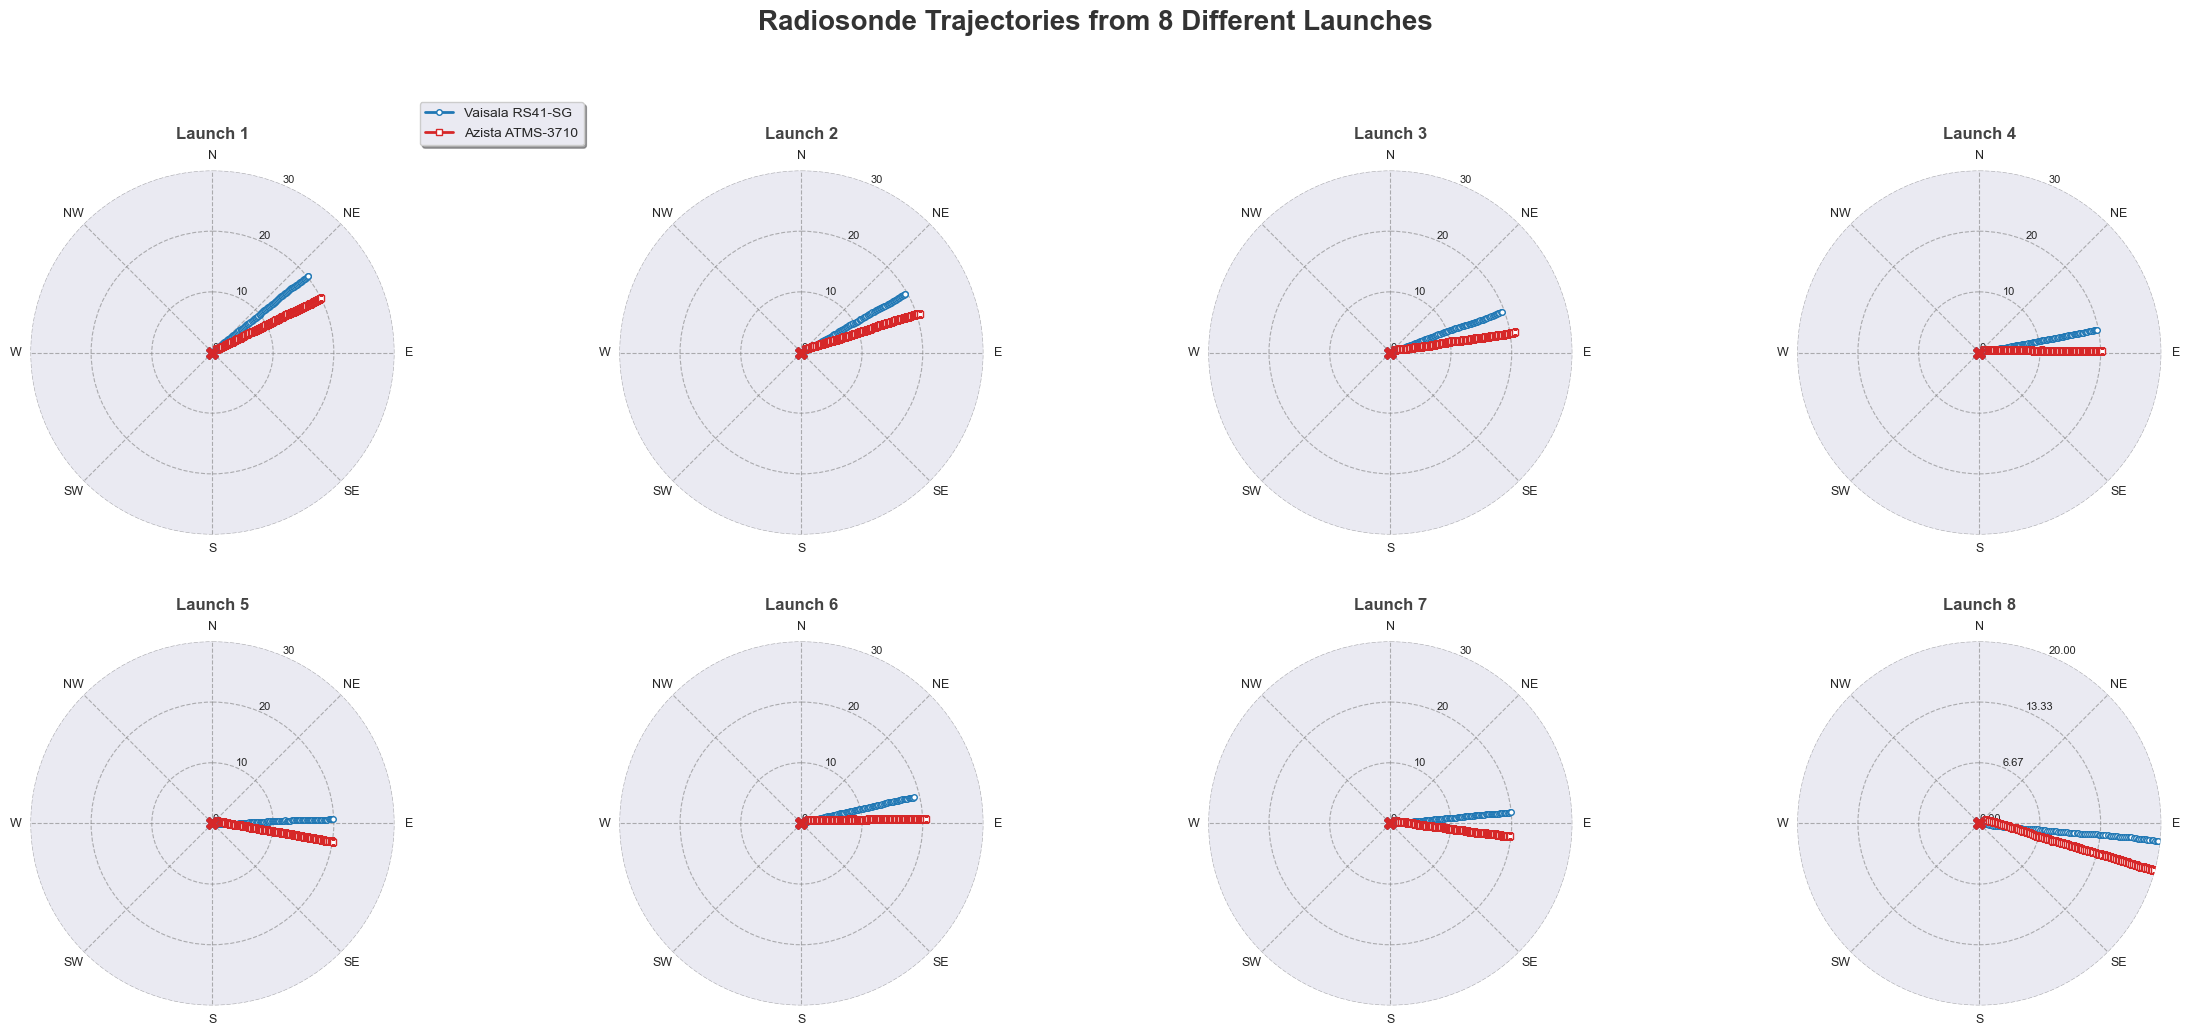

Plotting complete.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import radians, degrees, sin, cos, atan2, sqrt
import os

# --- Helper Functions for Polar Plot Calculations ---

def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the great-circle distance between two points on Earth
    (specified in decimal degrees) using the Haversine formula.
    Returns distance in kilometers.
    """
    R = 6371  # Radius of Earth in kilometers

    lat1_rad = radians(lat1)
    lon1_rad = radians(lon1)
    lat2_rad = radians(lat2)
    lon2_rad = radians(lon2)

    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad

    a = sin(dlat / 2)**2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

def calculate_bearing(lat1, lon1, lat2, lon2):
    """
    Calculate the bearing (direction) from point 1 to point 2.
    Returns bearing in degrees (0-360, North=0, East=90, South=180, West=270).
    """
    lat1_rad = radians(lat1)
    lon1_rad = radians(lon1)
    lat2_rad = radians(lat2)
    lon2_rad = radians(lon2)

    dlon = lon2_rad - lon1_rad

    y = sin(dlon) * cos(lat2_rad)
    x = cos(lat1_rad) * sin(lat2_rad) - sin(lat1_rad) * cos(lat2_rad) * cos(dlon)

    bearing_rad = atan2(y, x)
    bearing_deg = degrees(bearing_rad)
    bearing_deg = (bearing_deg + 360) % 360  # Normalize to 0-360 degrees

    return bearing_deg

# --- Utility Function: Generate Dummy Trajectory Data ---

def generate_dummy_launch_trajectory(
    launch_id,
    base_lat=17.3850, # Hyderabad, India
    base_lon=78.4867,
    num_points=100,
    avg_speed_km_per_point=0.2,
    general_wind_direction_deg=60
):
    """
    Generates dummy latitude and longitude data for a single radiosonde trajectory.
    Adds slight variations based on launch_id for distinct launches.
    """
    lat_offset = (launch_id % 3 - 1) * 0.008
    lon_offset = (launch_id % 4 - 2) * 0.008
    wind_variation = (launch_id % 5 - 2) * 4

    current_lat = base_lat + lat_offset
    current_lon = base_lon + lon_offset
    
    trajectory = [{'Latitude': current_lat, 'Longitude': current_lon}]

    for _ in range(num_points - 1):
        angle_rad = radians(general_wind_direction_deg + wind_variation + np.random.uniform(-8, 8))
        distance_km = avg_speed_km_per_point * (1 + np.random.uniform(-0.25, 0.25))

        delta_lat = (distance_km * cos(angle_rad)) / 111.0
        delta_lon = (distance_km * sin(angle_rad)) / (111.0 * cos(radians(current_lat)))

        current_lat += delta_lat
        current_lon += delta_lon
        trajectory.append({'Latitude': current_lat, 'Longitude': current_lon})

    return pd.DataFrame(trajectory)

# --- Main Plotting Function ---

def plot_multi_launch_polar_trajectories(vaisala_launches_data, azista_launches_data):
    """
    Plots the trajectories of Vaisala and Azista radiosondes on 8 separate polar plots
    in a grid, maintaining uniform colors.

    Args:
        vaisala_launches_data (list of pd.DataFrame): List of DataFrames, each containing
                                                      'Latitude' and 'Longitude' for one Vaisala launch.
        azista_launches_data (list of pd.DataFrame): List of DataFrames, each containing
                                                     'Latitude' and 'Longitude' for one Azista launch.

    Expected DataFrame Columns:
    - 'Latitude'
    - 'Longitude'
    """
    if len(vaisala_launches_data) != 8 or len(azista_launches_data) != 8:
        print("Error: Please provide exactly 8 launch DataFrames for both Vaisala and Azista.")
        return

    # Define uniform colors for each sensor model
    vaisala_color = '#1f77b4' # A standard Matplotlib blue
    azista_color = '#d62728'  # A standard Matplotlib red
    
    # Apply a plot style for overall aesthetics
    plt.style.use('seaborn-v0_8-darkgrid') # 'seaborn-v0_8-darkgrid', 'ggplot', 'fivethirtyeight'

    # Create a 2x4 grid of polar subplots
    fig, axs = plt.subplots(2, 4, figsize=(22, 11), subplot_kw={'projection': 'polar'})
    axs = axs.flatten() # Flatten the 2D array of axes for easy iteration

    plt.suptitle('Radiosonde Trajectories from 8 Different Launches', fontsize=20, weight='bold', color='#333333')

    for i in range(8):
        ax = axs[i]
        vaisala_df = vaisala_launches_data[i]
        azista_df = azista_launches_data[i]
        
        # Determine the launch point (first data point) for this specific launch
        if 'Latitude' not in vaisala_df.columns or 'Longitude' not in vaisala_df.columns:
            print(f"Error: Vaisala launch {i+1} DataFrame missing 'Latitude' or 'Longitude' columns.")
            continue
        if 'Latitude' not in azista_df.columns or 'Longitude' not in azista_df.columns:
            print(f"Error: Azista launch {i+1} DataFrame missing 'Latitude' or 'Longitude' columns.")
            continue

        launch_lat_v = vaisala_df['Latitude'].iloc[0]
        launch_lon_v = vaisala_df['Longitude'].iloc[0]
        
        # Using Vaisala's launch point as the common origin for each subplot
        origin_lat = launch_lat_v
        origin_lon = launch_lon_v

        # --- Process Vaisala Trajectory ---
        distances_v = []
        bearings_rad_v = []
        for index, row in vaisala_df.iterrows():
            if index == 0:
                distances_v.append(0)
                bearings_rad_v.append(0)
            else:
                dist = haversine_distance(origin_lat, origin_lon, row['Latitude'], row['Longitude'])
                bearing = calculate_bearing(origin_lat, origin_lon, row['Latitude'], row['Longitude'])
                distances_v.append(dist)
                bearings_rad_v.append(radians(bearing))
        
        # --- Process Azista Trajectory ---
        distances_a = []
        bearings_rad_a = []
        for index, row in azista_df.iterrows():
            if index == 0:
                distances_a.append(0)
                bearings_rad_a.append(0)
            else:
                dist = haversine_distance(origin_lat, origin_lon, row['Latitude'], row['Longitude'])
                bearing = calculate_bearing(origin_lat, origin_lon, row['Latitude'], row['Longitude'])
                distances_a.append(dist)
                bearings_rad_a.append(radians(bearing))

        # Plot Vaisala Trajectory
        ax.plot(bearings_rad_v, distances_v, color=vaisala_color, linewidth=2.0,
                marker='o', markersize=4, markerfacecolor='white', markeredgecolor=vaisala_color,
                label='Vaisala RS41-SG')
        ax.plot(0, 0, marker='X', markersize=8, color=vaisala_color, zorder=5, label='_nolegend_') # Launch point marker

        # Plot Azista Trajectory (now with solid line)
        ax.plot(bearings_rad_a, distances_a, color=azista_color, linewidth=2.0,
                marker='s', markersize=4, markerfacecolor='white', markeredgecolor=azista_color,
                label='Azista ATMS-3710')
        ax.plot(0, 0, marker='X', markersize=8, color=azista_color, zorder=5, label='_nolegend_') # Launch point marker

        # Set polar plot properties
        ax.set_theta_zero_location('N') # 0 degrees points North
        ax.set_theta_direction(-1)     # Clockwise direction (standard for bearings)
        ax.set_xticks(np.linspace(0, 2*np.pi, 8, endpoint=False))
        ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'], fontsize=9)
        
        # Set radial ticks (distance) dynamically
        max_dist = max(np.max(distances_v), np.max(distances_a)) if distances_v and distances_a else 0
        if max_dist > 0:
            # Generate more visually appealing ticks, e.g., in steps of 5, 10, or 20 km
            r_max_round = int(np.ceil(max_dist / 10.0)) * 10 if max_dist > 20 else int(np.ceil(max_dist / 5.0)) * 5
            if r_max_round == 0: r_max_round = 10 # Avoid 0 max tick for tiny movements
            ax.set_rlim(0, r_max_round)
            ax.set_yticks(np.linspace(0, r_max_round, 4, endpoint=True)) # 4 radial ticks
            ax.tick_params(axis='y', labelsize=8) # Smaller font for radial ticks
        else:
            ax.set_rlim(0, 10) # Default limit if no movement
            ax.set_yticks(np.linspace(0, 10, 3, endpoint=True))
            ax.tick_params(axis='y', labelsize=8)


        ax.set_title(f'Launch {i+1}', va='bottom', fontsize=12, weight='bold', color='#444444')
        ax.grid(True, linestyle='--', alpha=0.6, color='gray') # Finer, dashed grid lines
        
        # Add legend only to the first subplot
        if i == 0:
            ax.legend(loc='lower left', bbox_to_anchor=(1.05, 1.05), fontsize='medium', frameon=True, fancybox=True, shadow=True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.96]) # Adjust layout for suptitle and legend
    plt.show()


if __name__ == "__main__":
    # --- YOUR REAL DATA INTEGRATION PATH STARTS HERE ---

    # 1. DEFINE YOUR DATA FILE PATHS
    #    Create 8 file paths for Vaisala launches and 8 for Azista launches.
    #    Each file should contain Latitude and Longitude data for a single launch.
    
    # IMPORTANT: Update these lists with the FULL PATHS to your actual data files.
    # Example: If your files are in a 'data' subfolder:
    # data_directory = 'path/to/your/data_folder/'
    # vaisala_file_paths = [f'{data_directory}vaisala_launch_{i+1}.csv' for i in range(8)]
    # azista_file_paths = [f'{data_directory}azista_launch_{i+1}.csv' for i in range(8)]

    # For demonstration, we'll create dummy files if real ones aren't found.
    # In a real scenario, you would uncomment and modify the lines above.
    vaisala_file_paths = []
    azista_file_paths = []
    for i in range(8):
        vaisala_file_paths.append(f'dummy_vaisala_launch_{i+1}.csv')
        azista_file_paths.append(f'dummy_azista_launch_{i+1}.csv')

    # 2. LOAD YOUR DATA INTO LISTS OF PANDAS DATAFRAMES
    #    Each DataFrame in the list should contain 'Latitude' and 'Longitude' columns.

    loaded_vaisala_data = []
    loaded_azista_data = []
    data_loaded_successfully = True

    print("Attempting to load real data...")
    for i in range(8):
        try:
            # Vaisala data loading
            if os.path.exists(vaisala_file_paths[i]):
                df_v = pd.read_csv(vaisala_file_paths[i])
                # --- IMPORTANT: RENAME COLUMNS IF NECESSARY ---
                # If your Vaisala data has different column names (e.g., 'Lat', 'Lon'), uncomment and rename them here:
                # df_v = df_v.rename(columns={'Your_Lat_Column_Name': 'Latitude', 'Your_Lon_Column_Name': 'Longitude'})
                if 'Latitude' not in df_v.columns or 'Longitude' not in df_v.columns:
                    raise ValueError(f"Vaisala launch {i+1} data must contain 'Latitude' and 'Longitude' columns after renaming.")
                loaded_vaisala_data.append(df_v)
            else:
                raise FileNotFoundError(f"Vaisala file not found: {vaisala_file_paths[i]}")

            # Azista data loading
            if os.path.exists(azista_file_paths[i]):
                df_a = pd.read_csv(azista_file_paths[i])
                # --- IMPORTANT: RENAME COLUMNS IF NECESSARY ---
                # If your Azista data has different column names, rename them here:
                # df_a = df_a.rename(columns={'lat_sonde': 'Latitude', 'long_sonde': 'Longitude'})
                if 'Latitude' not in df_a.columns or 'Longitude' not in df_a.columns:
                    raise ValueError(f"Azista launch {i+1} data must contain 'Latitude' and 'Longitude' columns after renaming.")
                loaded_azista_data.append(df_a)
            else:
                raise FileNotFoundError(f"Azista file not found: {azista_file_paths[i]}")

        except (FileNotFoundError, ValueError, pd.errors.EmptyDataError, pd.errors.ParserError) as e:
            print(f"Error loading data for launch {i+1}: {e}")
            print("Falling back to generating and plotting DUMMY DATA for all launches.")
            data_loaded_successfully = False
            loaded_vaisala_data = []
            loaded_azista_data = []
            break

    # --- PLOT THE DATA ---
    if data_loaded_successfully and loaded_vaisala_data and loaded_azista_data:
        print("\nPlotting REAL radiosonde trajectories...")
        plot_multi_launch_polar_trajectories(loaded_vaisala_data, loaded_azista_data)
    else:
        print("\nReal data could not be loaded. Generating and plotting DUMMY DATA for demonstration.")
        
        dummy_vaisala_launches = []
        dummy_azista_launches = []
        for i in range(8):
            # Create dummy files if they don't exist, to match the file paths concept
            if not os.path.exists(f'dummy_vaisala_launch_{i+1}.csv'):
                dummy_v_df = generate_dummy_launch_trajectory(launch_id=i, general_wind_direction_deg=60 + i*5)
                dummy_v_df.to_csv(f'dummy_vaisala_launch_{i+1}.csv', index=False)
            else:
                dummy_v_df = pd.read_csv(f'dummy_vaisala_launch_{i+1}.csv')
            dummy_vaisala_launches.append(dummy_v_df)

            if not os.path.exists(f'dummy_azista_launch_{i+1}.csv'):
                dummy_a_df = generate_dummy_launch_trajectory(launch_id=i + 0.5, general_wind_direction_deg=60 + i*5 + 10) # Slightly different wind
                dummy_a_df.to_csv(f'dummy_azista_launch_{i+1}.csv', index=False)
            else:
                dummy_a_df = pd.read_csv(f'dummy_azista_launch_{i+1}.csv')
            dummy_azista_launches.append(dummy_a_df)

        plot_multi_launch_polar_trajectories(dummy_vaisala_launches, dummy_azista_launches)

    print("Plotting complete.")

    # --- Optional: Uncomment the following section to clean up dummy files after use ---
    # for i in range(8):
    #     if os.path.exists(f'dummy_vaisala_launch_{i+1}.csv'):
    #         os.remove(f'dummy_vaisala_launch_{i+1}.csv')
    #     if os.path.exists(f'dummy_azista_launch_{i+1}.csv'):
    #         os.remove(f'dummy_azista_launch_{i+1}.csv')